In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

In [2]:
df = pd.read_csv('/content/drive/MyDrive/zerocod/m07/reviews.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30 non-null     int64 
 1   review  30 non-null     object
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [4]:
def analyze_sentiment(text):
    """
    Анализирует тональность текста и возвращает метку и оценку
    """
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Определяем тональность по полярности
    if polarity > 0.1:
        sentiment = "позитивная"
    elif polarity < -0.1:
        sentiment = "негативная"
    else:
        sentiment = "нейтральная"

    return sentiment, polarity

In [5]:
# Применяем анализ тональности к каждому отзыву
df['sentiment'], df['polarity_score'] = zip(*df['review'].apply(analyze_sentiment))

In [6]:
# Сводная статистика
print("\n" + "=" * 80)
print("СВОДНАЯ СТАТИСТИКА")
print("=" * 80)

sentiment_counts = df['sentiment'].value_counts()
print(f"\nРаспределение тональности:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {sentiment}: {count} отзывов ({percentage:.1f}%)")

print(f"\nСредняя оценка тональности: {df['polarity_score'].mean():.3f}")


СВОДНАЯ СТАТИСТИКА

Распределение тональности:
  позитивная: 19 отзывов (63.3%)
  нейтральная: 8 отзывов (26.7%)
  негативная: 3 отзывов (10.0%)

Средняя оценка тональности: 0.257


(array([0, 1, 2]),
 [Text(0, 0, 'позитивная'),
  Text(1, 0, 'нейтральная'),
  Text(2, 0, 'негативная')])

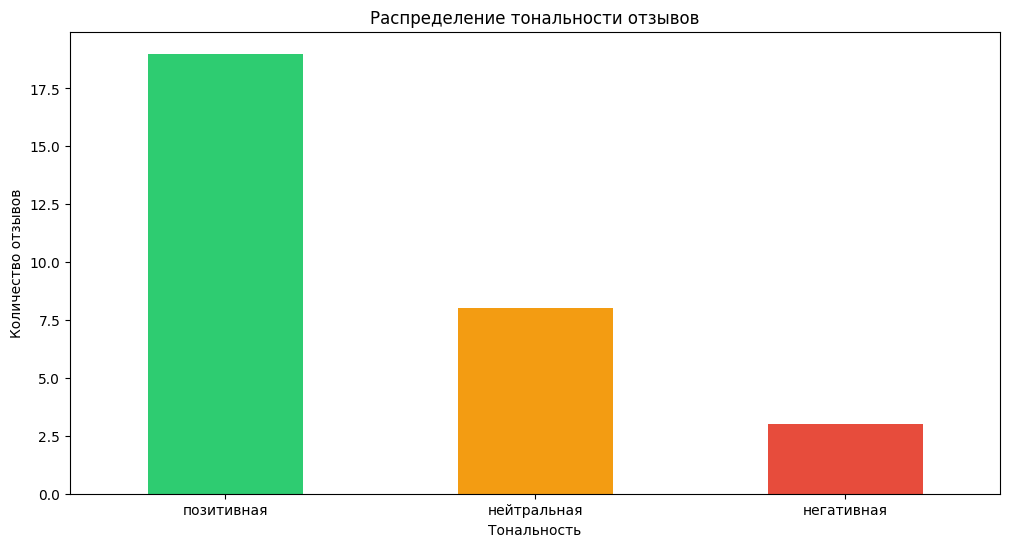

In [25]:
# Визуализация результатов
plt.figure(figsize=(12, 6))

# График 1: Распределение тональности
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # зеленый, оранжевый, красный
df['sentiment'].value_counts().plot(kind='bar', color=colors)
plt.title('Распределение тональности отзывов')
plt.xlabel('Тональность')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=0)

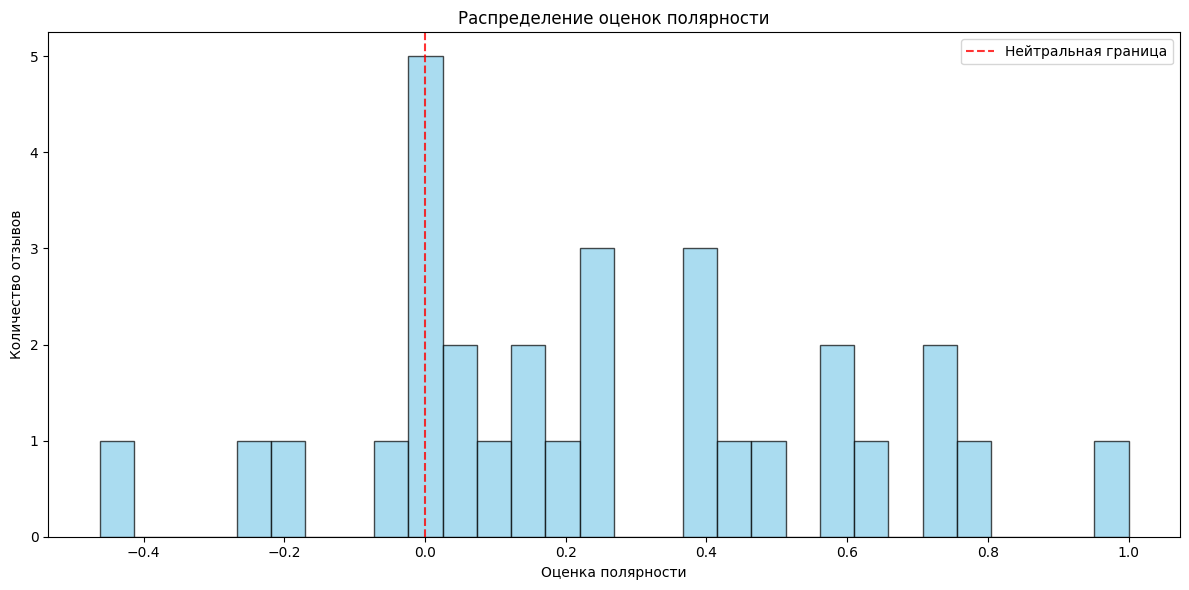

In [8]:
# Визуализация результатов
plt.figure(figsize=(12, 6))

plt.hist(df['polarity_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.8, label='Нейтральная граница')
plt.title('Распределение оценок полярности')
plt.xlabel('Оценка полярности')
plt.ylabel('Количество отзывов')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Функция для очистки текста
def clean_text(text):
    """
    Очищает текст для облака слов
    """
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем знаки препинания и цифры
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    return text

# Собираем все отзывы в один текст
all_reviews = ' '.join(df['review'].astype(str))

# Очищаем текст
cleaned_text = clean_text(all_reviews)

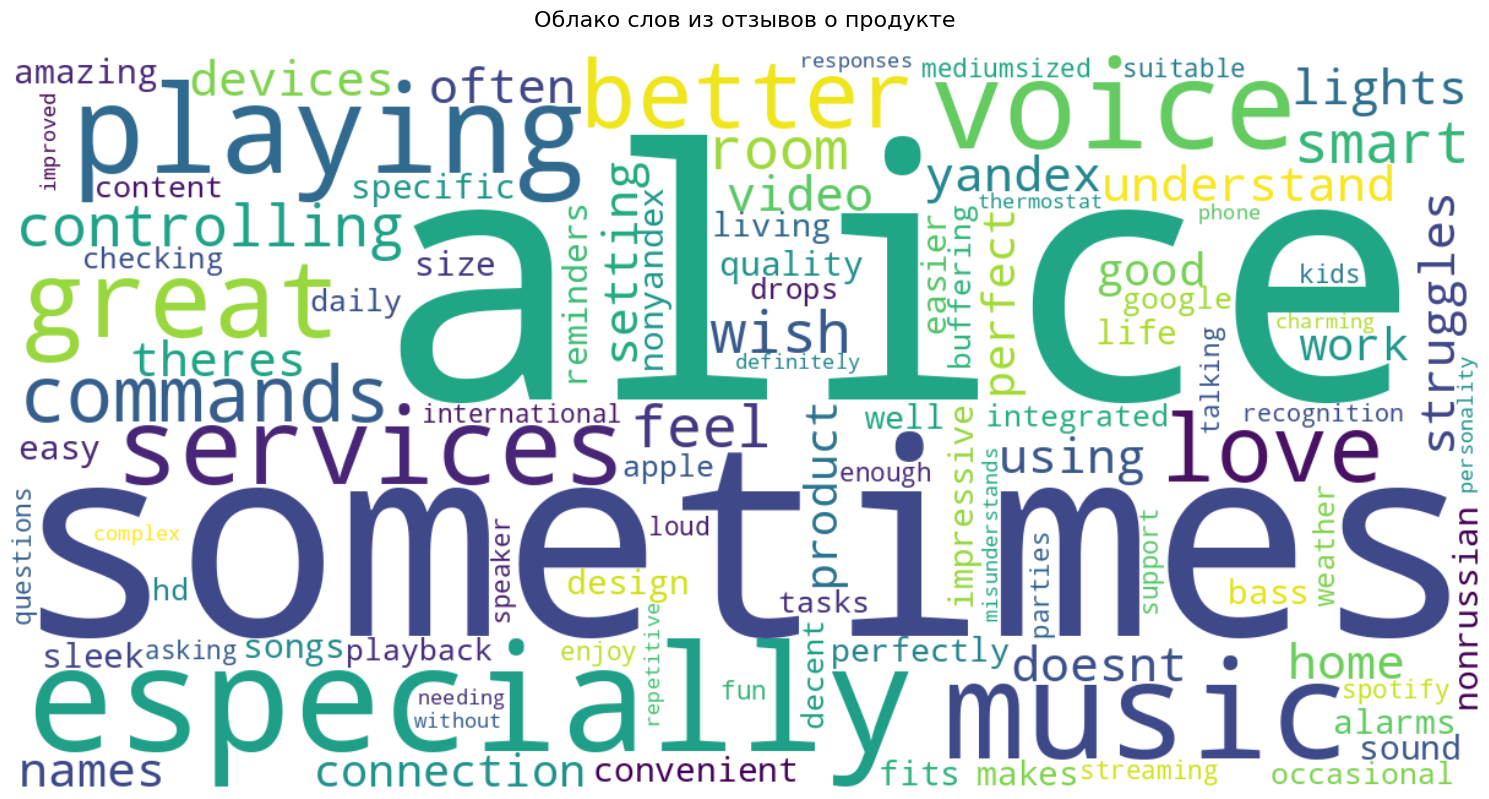

In [10]:
# Создаем облако слов
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',  # Другие варианты: 'plasma', 'inferno', 'magma', 'cool'
    max_words=100,
    contour_width=1,
    contour_color='steelblue',
    random_state=42,
    collocations=False,  # Убираем частые словосочетания
    stopwords=None  # Можно добавить стоп-слова
).generate(cleaned_text)

# Визуализация
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов из отзывов о продукте', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [16]:
from datetime import datetime, timedelta
import numpy as np

In [17]:
# Добавляем случайные временные метки за последние 30 дней
def add_timestamps(df):
    """Добавляет временные метки к отзывам"""
    # Создаем диапазон дат за последние 30 дней
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30)

    # Генерируем случайные даты в этом диапазоне
    date_range = [start_date + timedelta(days=np.random.randint(0, 30),
                                        hours=np.random.randint(0, 24),
                                        minutes=np.random.randint(0, 60))
                 for _ in range(len(df))]

    # Сортируем даты по возрастанию для реалистичности
    date_range.sort()

    df['timestamp'] = date_range
    df['date'] = df['timestamp'].dt.date
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['hour'] = df['timestamp'].dt.hour

    return df


In [18]:
# Добавляем временные метки
df_with_time = add_timestamps(df.copy())

print("ДАТАФРЕЙМ С ВРЕМЕННЫМИ МЕТКАМИ:")
print(df_with_time.info())
print("\nПервые 5 строк:")
print(df_with_time.head())

ДАТАФРЕЙМ С ВРЕМЕННЫМИ МЕТКАМИ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              30 non-null     int64         
 1   review          30 non-null     object        
 2   sentiment       30 non-null     object        
 3   polarity_score  30 non-null     float64       
 4   timestamp       30 non-null     datetime64[ns]
 5   date            30 non-null     object        
 6   day_of_week     30 non-null     object        
 7   hour            30 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 1.9+ KB
None

Первые 5 строк:
   id                                             review    sentiment  \
0   1  I love using Alice for setting reminders and a...   позитивная   
1   2  The sound quality is impressive for its size, ...   позитивная   
2   3  Sometim

In [19]:
# Подготовка временного ряда
def prepare_time_series(df):
    """Подготавливает данные для анализа временного ряда"""

    # Агрегация по дням
    daily_sentiment = df.groupby('date').agg({
        'polarity_score': ['mean', 'count', 'std'],
        'sentiment': lambda x: x.value_counts().to_dict(),
        'id': 'count'
    }).reset_index()

    # Упрощаем названия колонок
    daily_sentiment.columns = ['date', 'avg_polarity', 'review_count', 'polarity_std',
                              'sentiment_distribution', 'total_reviews']

    # Добавляем день недели
    daily_sentiment['day_of_week'] = pd.to_datetime(daily_sentiment['date']).dt.day_name()

    # Вычисляем распределение тональности в процентах
    def get_sentiment_percentages(sentiment_dict):
        total = sum(sentiment_dict.values())
        return {k: (v/total)*100 for k, v in sentiment_dict.items()}

    daily_sentiment['sentiment_percentages'] = daily_sentiment['sentiment_distribution'].apply(
        get_sentiment_percentages
    )

    return daily_sentiment

In [20]:
# Создаем временной ряд
time_series = prepare_time_series(df_with_time)

print("\n" + "="*60)
print("ВРЕМЕННОЙ РЯД ТОНАЛЬНОСТИ")
print("="*60)
print(time_series)


ВРЕМЕННОЙ РЯД ТОНАЛЬНОСТИ
          date  avg_polarity  review_count  polarity_std  \
0   2025-09-17      0.466667             1           NaN   
1   2025-09-19      0.437500             1           NaN   
2   2025-09-21      0.000000             1           NaN   
3   2025-09-23      0.407143             1           NaN   
4   2025-09-28      0.500000             2      0.707107   
5   2025-09-29      0.000000             1           NaN   
6   2025-09-30      0.227778             2      0.243559   
7   2025-10-02      0.000000             1           NaN   
8   2025-10-03      0.400000             1           NaN   
9   2025-10-04      0.080556             3      0.156421   
10  2025-10-05      0.225000             1           NaN   
11  2025-10-06      0.303571             2      0.429315   
12  2025-10-07      0.275000             2      0.671751   
13  2025-10-09      0.104167             3      0.522431   
14  2025-10-10      0.478571             2      0.454569   
15  2025-10-1

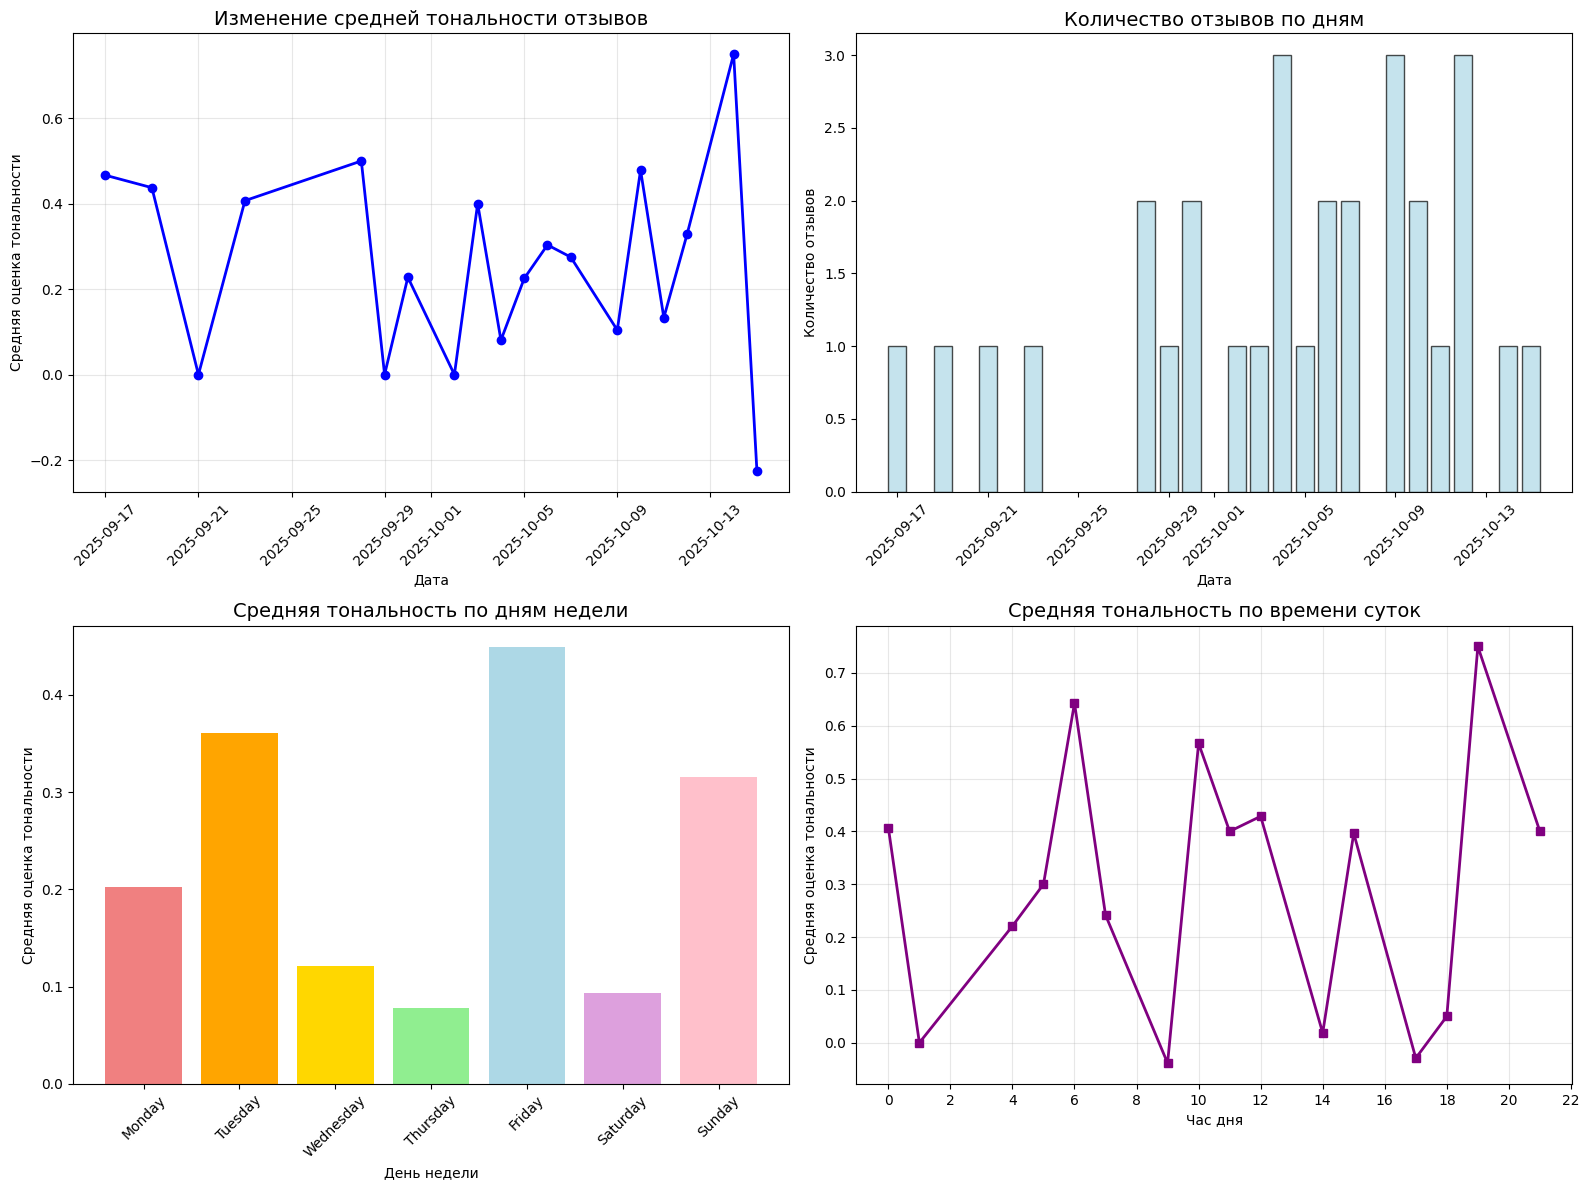

In [21]:
# Визуализация временного ряда
def plot_sentiment_time_series(time_series, df_with_time):
    """Визуализирует изменение тональности во времени"""

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # График 1: Средняя тональность по дням
    axes[0, 0].plot(time_series['date'], time_series['avg_polarity'],
                   marker='o', linewidth=2, markersize=6, color='blue')
    axes[0, 0].set_title('Изменение средней тональности отзывов', fontsize=14)
    axes[0, 0].set_xlabel('Дата')
    axes[0, 0].set_ylabel('Средняя оценка тональности')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)

    # График 2: Количество отзывов по дням
    axes[0, 1].bar(time_series['date'], time_series['review_count'],
                  color='lightblue', edgecolor='black', alpha=0.7)
    axes[0, 1].set_title('Количество отзывов по дням', fontsize=14)
    axes[0, 1].set_xlabel('Дата')
    axes[0, 1].set_ylabel('Количество отзывов')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # График 3: Распределение тональности по дням недели
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sentiment_by_day = df_with_time.groupby('day_of_week')['polarity_score'].mean().reindex(day_order)
    axes[1, 0].bar(sentiment_by_day.index, sentiment_by_day.values,
                  color=['lightcoral', 'orange', 'gold', 'lightgreen', 'lightblue', 'plum', 'pink'])
    axes[1, 0].set_title('Средняя тональность по дням недели', fontsize=14)
    axes[1, 0].set_xlabel('День недели')
    axes[1, 0].set_ylabel('Средняя оценка тональности')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # График 4: Распределение тональности по времени суток
    sentiment_by_hour = df_with_time.groupby('hour')['polarity_score'].mean()
    axes[1, 1].plot(sentiment_by_hour.index, sentiment_by_hour.values,
                   marker='s', linewidth=2, markersize=6, color='purple')
    axes[1, 1].set_title('Средняя тональность по времени суток', fontsize=14)
    axes[1, 1].set_xlabel('Час дня')
    axes[1, 1].set_ylabel('Средняя оценка тональности')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_xticks(range(0, 24, 2))

    plt.tight_layout()
    plt.show()

# Строим графики
plot_sentiment_time_series(time_series, df_with_time)

In [22]:
# Дополнительный анализ
def additional_analysis(df_with_time, time_series):
    """Дополнительный анализ временных паттернов"""

    print("\n" + "="*60)
    print("ДОПОЛНИТЕЛЬНАЯ АНАЛИТИКА")
    print("="*60)

    # Статистика по дням недели
    print("\nСредняя тональность по дням недели:")
    daily_stats = df_with_time.groupby('day_of_week').agg({
        'polarity_score': ['mean', 'count'],
        'sentiment': lambda x: x.mode()[0] if not x.mode().empty else 'нет данных'
    }).round(3)
    print(daily_stats)

    # Тренд тональности
    print(f"\nОбщий тренд тональности:")
    print(f"Начальная дата: {time_series['date'].min()}")
    print(f"Конечная дата: {time_series['date'].max()}")
    print(f"Изменение тональности: {time_series['avg_polarity'].iloc[-1] - time_series['avg_polarity'].iloc[0]:.3f}")

    # День с наибольшим количеством отзывов
    busiest_day = time_series.loc[time_series['review_count'].idxmax()]
    print(f"\nСамый активный день: {busiest_day['date']}")
    print(f"Количество отзывов: {busiest_day['review_count']}")
    print(f"Средняя тональность в этот день: {busiest_day['avg_polarity']:.3f}")

# Выполняем дополнительный анализ
additional_analysis(df_with_time, time_series)


ДОПОЛНИТЕЛЬНАЯ АНАЛИТИКА

Средняя тональность по дням недели:
            polarity_score          sentiment
                      mean count     <lambda>
day_of_week                                  
Friday               0.449     4   позитивная
Monday               0.202     3  нейтральная
Saturday             0.094     4  нейтральная
Sunday               0.316     7   позитивная
Thursday             0.078     4   позитивная
Tuesday              0.360     6   позитивная
Wednesday            0.121     2   негативная

Общий тренд тональности:
Начальная дата: 2025-09-17
Конечная дата: 2025-10-15
Изменение тональности: -0.692

Самый активный день: 2025-10-04
Количество отзывов: 3
Средняя тональность в этот день: 0.081
